In [2]:
 from sklearn import datasets
 import numpy as np
 iris = datasets.load_iris()
 print(iris.feature_names)
 print(iris.data[:5, :])
 print(iris.target[:5])
 print(iris.target[50:55])
 print(iris.target[100:105])
 print(iris.target_names)
 X = iris["data"][:, 3:] # petal width
 y = (iris["target"]== 2).astype(int) # 1 if Iris-Virginica, else 0



['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]
[0 0 0 0 0]
[1 1 1 1 1]
[2 2 2 2 2]
['setosa' 'versicolor' 'virginica']


In [3]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
log_reg = LogisticRegression()
log_reg.fit(X, y)
p_X=log_reg.predict(X)
accuracy_score(y, p_X)

0.96

[0.99924905 0.99923922 0.99922927 0.99921918 0.99920897]
[0.00075095 0.00076078 0.00077073 0.00078082 0.00079103]


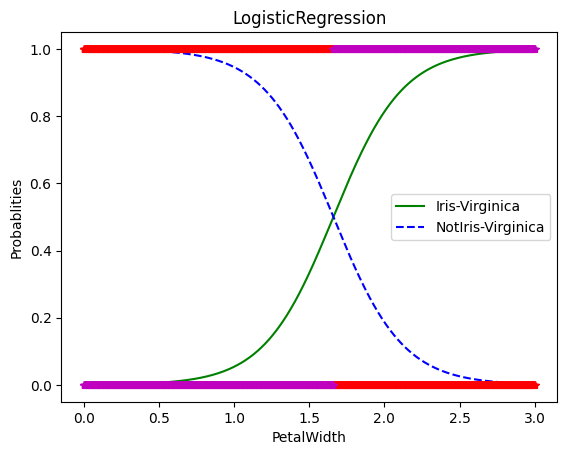

In [4]:
import matplotlib.pyplot as plt
fig,ax=plt.subplots()
X_new=np.linspace(0,3,1000).reshape(-1,1)
y_proba=log_reg.predict_proba(X_new)
p_X=log_reg.predict(X_new)
print(y_proba[:5,0])
print(y_proba[:5,1])
ax.plot(X_new,y_proba[:,1],"g-", label="Iris-Virginica")
ax.plot(X_new,y_proba[:,0],"b--", label="NotIris-Virginica")
ax.plot(X_new,p_X==0,"r*")
ax.plot(X_new,p_X==1,"m*")
ax.set(xlabel='PetalWidth',ylabel='Probablities', title='LogisticRegression')
ax.legend(loc='center right')

Accuracy: 86.67%


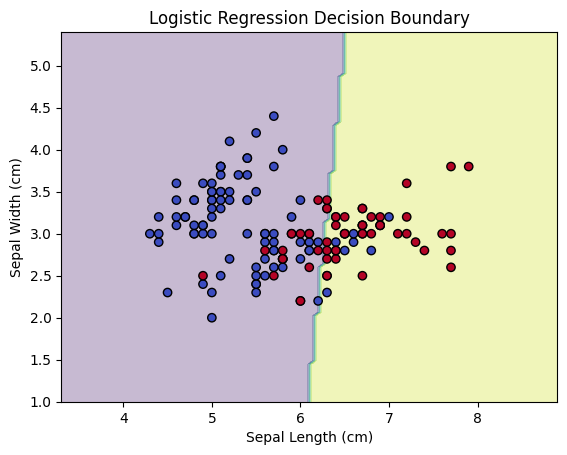

In [6]:
#Activity 2 (Submission)
# Step 1 IMPORT LIBRARIES
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

# Load the Iris dataset
iris = load_iris()
X = iris.data[:, :2]  # Using 'sepal length' and 'sepal width'
y = (iris.target == 2).astype(int)  # 1 if Iris-Virginica, else 0

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train Logistic Regression Model
model = LogisticRegression()
model.fit(X_train, y_train)

# Calculate Accuracy
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')

# Decision Boundary Plotting
def plot_decision_boundary(X, y, model):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                         np.linspace(y_min, y_max, 100))

    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, alpha=0.3)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap='coolwarm', edgecolors='k')
    plt.xlabel('Sepal Length (cm)')
    plt.ylabel('Sepal Width (cm)')
    plt.title('Logistic Regression Decision Boundary')
    plt.show()

plot_decision_boundary(X, y, model)




In [7]:
# logistic Regression (Activity 2)
from sklearn import datasets
import numpy as np
iris = datasets.load_iris()
X=iris["data"][:, :2] # 'sepal length (cm)', 'sepal width (cm)'
y =(iris["target"] == 2).astype(int) # 1 if Iris-Virginica, else 0

In [8]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
log_reg = LogisticRegression()
log_reg.fit(X, y)
accuracy_score(y, log_reg.predict(X))

0.8

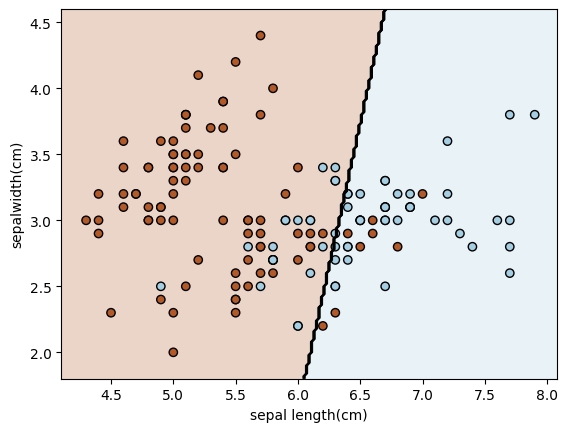

In [9]:
# Logistic Regression (Activity 2)
import numpy as np
def plot_decision_boundary(clf,X,Y,cmap='Paired_r'):
  fig,ax=plt.subplots()
  h=0.02
  x1_min,x1_max=X[:,0].min()-10*h,X[:,0].max()+10*h
  x2_min,x2_max=X[:,1].min()-10*h,X[:,1].max()+10*h
  xx1,xx2=np.meshgrid(np.arange(x1_min,x1_max,h),np.arange(x2_min,x2_max,h))
  Z=clf.predict(np.c_[xx1.ravel(),xx2.ravel()])
  Z=Z.reshape(xx1.shape)
  ax.contourf(xx1,xx2,Z,cmap=cmap,alpha=0.25)
  ax.contour(xx1,xx2,Z,colors='k', linewidths=0.7)
  ax.scatter(X[:,0],X[:,1],c=Y,cmap=cmap,edgecolors='k')
  ax.set(xlabel='sepal length(cm)',ylabel='sepalwidth(cm)')
plot_decision_boundary(log_reg,X,y)


In [10]:
# One verses All Model
from sklearn.datasets import load_digits
#Loading
mnist=load_digits()
X, y =mnist["data"], mnist["target"]
X.shape,y.shape


((1797, 64), (1797,))

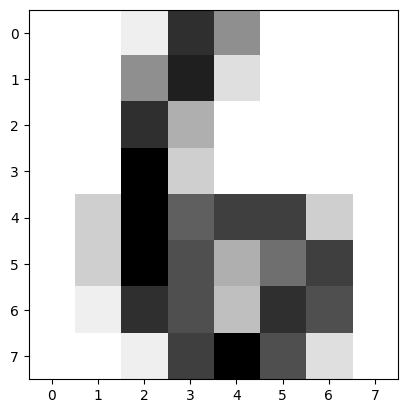

np.int64(6)

In [11]:
# One verses All Model
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

some_digit = X[360]
some_digit_image = some_digit.reshape(8, 8)

plt.imshow(some_digit_image, cmap=matplotlib.cm.binary)
plt.show()

y[360]


In [12]:
X_train, X_test, y_train, y_test = X[:1300], X[1300:], y[:1300], y[1300:]
from sklearn.linear_model import SGDClassifier
y_train_6 = (y_train == 6) # True for all 6s, False for all other digits.
y_test_6 = (y_test == 6)
sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train, y_train_6)
sgd_clf.predict([some_digit])

array([ True])

In [13]:
sgd_clf.fit(X_train, y_train)
print(sgd_clf.predict([some_digit]))
some_digit_scores = sgd_clf.decision_function([some_digit])
print(some_digit_scores)


[6]
[[-2235.94986309 -2471.5742962  -4359.10982222 -4768.08558271
  -1990.89658701 -2605.83291481  1734.83482782 -4607.82626982
   -467.68247317 -5462.80074768]]


In [14]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
p_X=log_reg.predict(X_test)
print(accuracy_score(y_test, p_X))
some_digit_scores = log_reg.decision_function([some_digit])
print(some_digit_scores)
print(log_reg.predict([some_digit]))


0.9195171026156942
[[  8.28111075  -5.68508485  -3.75477564  -8.40228123   5.26559319
    1.35450763  22.09972965  -8.90636458   7.58377652 -17.83621144]]
[6]


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [17]:
from sklearn.multiclass import OneVsOneClassifier
from sklearn.linear_model import SGDClassifier

# Initialize and train the classifier
ovo_clf = OneVsOneClassifier(SGDClassifier(random_state=42))
ovo_clf.fit(X_train, y_train)

# Predict and display the result
print(ovo_clf.predict([some_digit]))

# Display the number of classifiers
print("Number of Classifiers:", len(ovo_clf.estimators_))


[6]
Number of Classifiers: 45
